In [1]:
%matplotlib inline
from __future__ import division

import xarray as xr
import cartopy.crs as ccrs
import matplotlib.pyplot as plt

In [2]:
mslr_2026_85 = "http://ihthreddsdev.ihcantabria.com/thredds/dodsC/ECLISEA/MSLR/projections/maps/rcp85/2026_2045/Overall/Overall_changes_MSLR_mean_rcp85_2026_2045.nc"
mslr_2081_85 = "http://ihthreddsdev.ihcantabria.com/thredds/dodsC/ECLISEA/MSLR/projections/maps/rcp85/2081_2100/Overall/Overall_changes_MSLR_mean_rcp85_2081_2100.nc"
ds_2026_85 = xr.open_dataset(mslr_2026_85)["diff_mslr_mean"]
ds_2081_85 = xr.open_dataset(mslr_2081_85)["diff_mslr_mean"]

mslr_mean = xr.concat([ds_2026_85,ds_2081_85], dim='time')



In [3]:
figsize = [12, 8]
dpi = 100
extent = [mslr_mean.longitude.min() -10,mslr_mean.longitude.max() + 10,mslr_mean.latitude.min() -10 ,mslr_mean.latitude.max() +10]
map_proj = ccrs.Mercator(min_latitude=20, max_latitude=65)

fig = plt.figure()
plt.rcParams['figure.figsize'] = figsize
plt.rcParams['figure.dpi'] = dpi

<Figure size 432x288 with 0 Axes>

/home/felipe/miniconda3/envs/eclisea-jupyter/lib/python3.9/site-packages/xarray/plot/facetgrid.py:373: UserWarning: Tight layout not applied. The left and right margins cannot be made large enough to accommodate all axes decorations. 
  self.fig.tight_layout()


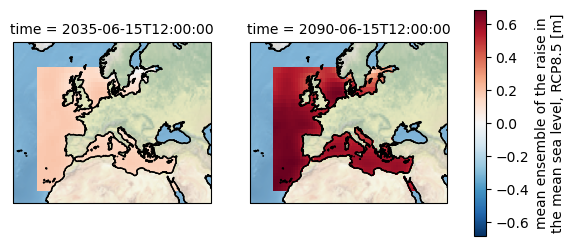

In [4]:
p = mslr_mean.plot(transform=ccrs.PlateCarree(),  # the data's projection
             col='time', col_wrap=2,  # multiplot settings
             subplot_kws={'projection': map_proj})  # the plot's projection
for ax in p.axes.flat:
    ax.coastlines()
    ax.set_global()
    ax.stock_img()
    ax.coastlines()

    ax.set_extent(extent)